# CatBoost basics

For this homework will use dataset Amazon Employee Access Challenge from [Kaggle](https://www.kaggle.com) competition for our experiments. Data can be downloaded [here](https://www.kaggle.com/c/amazon-employee-access-challenge/data).

As a result of this tutorial you need to provide a tsv file with answers.
There are 17 questions in this tutorial. The resulting tsv file should consist of 17 lines, each line should contain the number of the question, an answer to it and a tab separater between them. Questions are numbered from 1 to 17.
See an example of the resulting file here.

## Reading the data

Let's first download the data and put it to folder `amazon`. Now we will read this data from file.

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)
import catboost
from catboost import datasets
from catboost import *

from grader_v2 import Grader

In [2]:
train_df, test_df = catboost.datasets.amazon()
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
len(train_df)

32769

In [4]:
grader = Grader()

## Preparing your data

Label values extraction

In [5]:
y = train_df.ACTION
X = train_df.drop("ACTION", axis=1)

Categorical features declaration

In [6]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


Now it makes sense to ananyze the dataset.
First you need to calculate how many positive and negative objects are present in the train dataset.

**Question 1:**

How many negative objects are present in the train dataset X?

In [7]:
zero_count = (y == 0).sum()
grader.submit_tag("negative_samples", zero_count)

Current answer for task negative_samples is: 1897


**Question 2:**

How many positive objects are present in the train dataset X?

In [8]:
one_count = (y == 1).sum()
grader.submit_tag("positive_samples", one_count)

Current answer for task positive_samples is: 30872


In [9]:
print("Zero count = " + str(zero_count) + ", One count = " + str(one_count))

Zero count = 1897, One count = 30872


Now for every feature you need to calculate number of unique values of this feature.

**Question 3:**
    
How many unique values has feature RESOURCE?

In [10]:
unique_vals_for_RESOURCE = len(train_df.RESOURCE.unique())
grader.submit_tag("resource_unique_values", unique_vals_for_RESOURCE)

Current answer for task resource_unique_values is: 7518


Now we can create a Pool object. This type is used for datasets in CatBoost. You can also use numpy array or dataframe. Working with Pool class is the most efficient way in terms of memory and speed. We recommend to create Pool from file in case if you have your data on disk or from FeaturesData if you use numpy.

In [11]:
import numpy as np
from catboost import Pool

pool1 = Pool(data=X, label=y, cat_features=cat_features)
# pool2 = Pool(data='/opt/conda/lib/python3.6/site-packages/catboost/cached_datasets/amazon/train.csv', delimiter=',', has_header=True)
pool3 = Pool(data=X, cat_features=cat_features)

print("Dataset shape")
# print('dataset 1:' + str(pool1.shape) + '\ndataset 2:' + str(pool2.shape)  + '\ndataset 3:' + str(pool3.shape))

print("\n")
print("Column names")
print("dataset 1: ")
print(pool1.get_feature_names())
# print('\ndataset 2:')
# print(pool2.get_feature_names())
print("\ndataset 3:")
print(pool3.get_feature_names())

Dataset shape


Column names
dataset 1: 
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 3:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


## Split your data into train and validation

When you will be training your model, you will have to detect overfitting and select best parameters. To do that you need to have a validation dataset.
Normally you would be using some random split, for example
`train_test_split` from `sklearn.model_selection`.
But for the purpose of this homework the train part will be the first 80% of the data and the evaluation part will be the last 20% of the data.

In [12]:
train_count = int(X.shape[0] * 0.8)

X_train = X.iloc[:train_count, :]
y_train = y[:train_count]
X_validation = X.iloc[train_count:, :]
y_validation = y[train_count:]

## Train your model

Now we will train our first model.

In [13]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=5, random_seed=0, learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level="Silent",
)
print("Model is fitted: " + str(model.is_fitted()))
print("Model params:")
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1, 'random_seed': 0}


## Stdout of the training

You can see in stdout values of the loss function on each iteration, or on each k-th iteration.
You can also see how much time passed since the start of the training and how much time is left.

In [14]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=15, verbose=3)
model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.441257
0:	learn: 0.4218644	test: 0.4238882	best: 0.4238882 (0)	total: 5.03ms	remaining: 70.4ms
3:	learn: 0.2323838	test: 0.2357560	best: 0.2357560 (3)	total: 46.9ms	remaining: 129ms
6:	learn: 0.1868476	test: 0.1795406	best: 0.1795406 (6)	total: 91.3ms	remaining: 104ms
9:	learn: 0.1786571	test: 0.1689628	best: 0.1689628 (9)	total: 135ms	remaining: 67.4ms
12:	learn: 0.1731382	test: 0.1639559	best: 0.1639559 (12)	total: 176ms	remaining: 27.1ms
14:	learn: 0.1720164	test: 0.1623020	best: 0.1623020 (14)	total: 210ms	remaining: 0us

bestTest = 0.1623019855
bestIteration = 14



## Random seed

If you don't specify random_seed then random seed will be set to a new value each time.
After the training has finished you can look on the value of the random seed that was set.
If you train again with this random_seed, you will get the same results.

In [15]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=5)
model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.5
0:	learn: 0.3963217	test: 0.3986149	best: 0.3986149 (0)	total: 4.84ms	remaining: 19.4ms
1:	learn: 0.2934864	test: 0.2972563	best: 0.2972563 (1)	total: 12.3ms	remaining: 18.4ms
2:	learn: 0.2495301	test: 0.2543897	best: 0.2543897 (2)	total: 18.5ms	remaining: 12.4ms
3:	learn: 0.2235704	test: 0.2267986	best: 0.2267986 (3)	total: 33.3ms	remaining: 8.33ms
4:	learn: 0.2003235	test: 0.1962958	best: 0.1962958 (4)	total: 48.1ms	remaining: 0us

bestTest = 0.1962957582
bestIteration = 4



In [16]:
random_seed = model.random_seed_
print("Used random seed = " + str(random_seed))
model = CatBoostClassifier(iterations=5, random_seed=random_seed)
model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Used random seed = 0
Learning rate set to 0.5
0:	learn: 0.3963217	test: 0.3986149	best: 0.3986149 (0)	total: 4.81ms	remaining: 19.2ms
1:	learn: 0.2934864	test: 0.2972563	best: 0.2972563 (1)	total: 13.2ms	remaining: 19.8ms
2:	learn: 0.2495301	test: 0.2543897	best: 0.2543897 (2)	total: 19.5ms	remaining: 13ms
3:	learn: 0.2235704	test: 0.2267986	best: 0.2267986 (3)	total: 34.8ms	remaining: 8.69ms
4:	learn: 0.2003235	test: 0.1962958	best: 0.1962958 (4)	total: 49.4ms	remaining: 0us

bestTest = 0.1962957582
bestIteration = 4



Try training 10 models with parameters and calculate mean and the standart deviation of Logloss error on validation dataset.

**Question 4:**

What is the mean value of the Logloss metric on validation dataset (X_validation, y_validation) after 10 times training `CatBoostClassifier` with different random seeds in the following way:

```python
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    random_seed={my_random_seed}
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)
```

In [18]:
for i in range(10):
    model = CatBoostClassifier(
        iterations=300, learning_rate=0.1, random_seed=i, verbose=300
    )
    model.fit(
        X_train,
        y_train,
        cat_features=cat_features,
        eval_set=(X_validation, y_validation),
    )

0:	learn: 0.5790122	test: 0.5797377	best: 0.5797377 (0)	total: 8.72ms	remaining: 2.61s
299:	learn: 0.1321847	test: 0.1384603	best: 0.1383851 (297)	total: 14.9s	remaining: 0us

bestTest = 0.1383851034
bestIteration = 297

Shrink model to first 298 iterations.
0:	learn: 0.5785841	test: 0.5796622	best: 0.5796622 (0)	total: 23.5ms	remaining: 7.04s
299:	learn: 0.1316884	test: 0.1381922	best: 0.1381423 (288)	total: 17.4s	remaining: 0us

bestTest = 0.1381422792
bestIteration = 288

Shrink model to first 289 iterations.
0:	learn: 0.5763439	test: 0.5765393	best: 0.5765393 (0)	total: 49.6ms	remaining: 14.8s
299:	learn: 0.1309546	test: 0.1371102	best: 0.1369395 (291)	total: 17.2s	remaining: 0us

bestTest = 0.1369394559
bestIteration = 291

Shrink model to first 292 iterations.
0:	learn: 0.5777218	test: 0.5783576	best: 0.5783576 (0)	total: 33.2ms	remaining: 9.92s
299:	learn: 0.1308087	test: 0.1373528	best: 0.1370832 (288)	total: 17.5s	remaining: 0us

bestTest = 0.1370832193
bestIteration = 288

Sh

In [19]:
mean = np.mean(
    [
        0.1383851034,
        0.1381422792,
        0.1369394559,
        0.1370832193,
        0.1378044511,
        0.1383033557,
        0.1367547545,
        0.1379628905,
        0.1365422953,
        0.1381121593,
    ]
)
grader.submit_tag("logloss_mean", mean)

Current answer for task logloss_mean is: 0.13760299642


**Question 5:**

What is the standard deviation of it?

In [21]:
stddev = np.std(
    [
        0.1383851034,
        0.1381422792,
        0.1369394559,
        0.1370832193,
        0.1378044511,
        0.1383033557,
        0.1367547545,
        0.1379628905,
        0.1365422953,
        0.1381121593,
    ]
)
grader.submit_tag("logloss_std", stddev)

Current answer for task logloss_std is: 0.0006616215261239671


## Metrics calculation and graph plotting

When experimenting with Jupyter notebook you can see graphs of different errors during training.
To do that you need to use `plot=True` parameter.

In [23]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=50, random_seed=63, learning_rate=0.1, custom_loss=["Accuracy"]
)
model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level="Silent",
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 6:**

What is the value of the accuracy metric value on evaluation dataset after training with parameters `iterations=50`, `random_seed=63`, `learning_rate=0.1`?

In [24]:
accuracy = 0.9440036
grader.submit_tag("accuracy_6", accuracy)

Current answer for task accuracy_6 is: 0.9440036


## Model comparison

In [25]:
model1 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=1000,
    random_seed=64,
    train_dir="learning_rate_0.5",
    custom_loss=["Accuracy"],
)

model2 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=64,
    train_dir="learning_rate_0.05",
    custom_loss=["Accuracy"],
)
model1.fit(
    X_train,
    y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=100,
)
model2.fit(
    X_train,
    y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=100,
)

0:	learn: 0.3007996	test: 0.3044268	best: 0.3044268 (0)	total: 23.2ms	remaining: 23.2s
100:	learn: 0.1222057	test: 0.1471968	best: 0.1437261 (51)	total: 6.13s	remaining: 54.6s
200:	learn: 0.1004717	test: 0.1495944	best: 0.1437261 (51)	total: 12.7s	remaining: 50.6s
300:	learn: 0.0799802	test: 0.1579884	best: 0.1437261 (51)	total: 19.1s	remaining: 44.4s
400:	learn: 0.0654838	test: 0.1629552	best: 0.1437261 (51)	total: 25.3s	remaining: 37.8s
500:	learn: 0.0532750	test: 0.1703075	best: 0.1437261 (51)	total: 31.3s	remaining: 31.2s
600:	learn: 0.0447430	test: 0.1771635	best: 0.1437261 (51)	total: 37.8s	remaining: 25.1s
700:	learn: 0.0392890	test: 0.1800291	best: 0.1437261 (51)	total: 44.2s	remaining: 18.9s
800:	learn: 0.0343875	test: 0.1840537	best: 0.1437261 (51)	total: 51.4s	remaining: 12.8s
900:	learn: 0.0301990	test: 0.1877116	best: 0.1437261 (51)	total: 58s	remaining: 6.37s
999:	learn: 0.0276268	test: 0.1893815	best: 0.1437261 (51)	total: 1m 3s	remaining: 0us

bestTest = 0.1437260616
be

In [26]:
from catboost import MetricVisualizer

MetricVisualizer(["learning_rate_0.05", "learning_rate_0.5"]).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 7:**

Try training these models for 1000 iterations. Which model will give better best resulting Accuracy on validation dataset?
By best resulting accuracy we mean accuracy on best iteration, which might be not the last iteration.

In [30]:
best_model_name = (
    "learning_rate_0.05"  # one of 'learning_rate_0.5', 'learning_rate_0.05'
)
grader.submit_tag("best_model_name", best_model_name)

Current answer for task best_model_name is: learning_rate_0.05


## Best iteration

If a validation dataset is present then after training, the model is shrinked to a number of trees when it got best evaluation metric value on validation dataset.
By default evaluation metric is the optimized metric. But you can set evaluation metric to some other metric.
In the example below evaluation metric is `Accuracy`.

In [31]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100, random_seed=63, learning_rate=0.5, eval_metric="Accuracy"
)
model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level="Silent",
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [32]:
print("Tree count: " + str(model.tree_count_))

Tree count: 25


If you don't want the model to be shrinked, you can set `use_best_model=False`

**Question 8:**
    
What will be the number of trees in the resulting model after training with validation dataset with parameters `iterations=100`, ` learning_rate=0.5`, `eval_metric='Accuracy'` and with parameter `use_best_model=False`

In [33]:
tree_count = 100
grader.submit_tag("num_trees", tree_count)

Current answer for task num_trees is: 100


## Cross-validation

The next functionality you need to know about is cross-validation.
For unbalanced datasets stratified cross-validation can be useful.

In [34]:
from catboost import cv

params = {}
params["loss_function"] = "Logloss"
params["iterations"] = 80
params["custom_loss"] = "AUC"
params["random_seed"] = 63
params["learning_rate"] = 0.5

cv_data = cv(
    params=params,
    pool=Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Cross-validation returns specified metric values on every iteration (or every k-th iteration, if you specify so)

In [35]:
print(cv_data[0:4])

   iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.302032          0.001408            0.301524   
1           1           0.231446          0.001831            0.231788   
2           2           0.191972          0.002319            0.198021   
3           3           0.178977          0.001243            0.187314   

   train-Logloss-std  test-AUC-mean  test-AUC-std  
0           0.000863       0.539535      0.005601  
1           0.001483       0.598963      0.009583  
2           0.002158       0.790310      0.008770  
3           0.001762       0.810502      0.012842  


Let's look on mean value and standard deviation of Logloss for cv on best iteration.

In [36]:
best_value = np.min(cv_data["test-Logloss-mean"])
best_iter = np.argmin(cv_data["test-Logloss-mean"])

print(
    "Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}".format(
        best_value, cv_data["test-Logloss-std"][best_iter], best_iter
    )
)

Best validation Logloss score, not stratified: 0.1577±0.0025 on step 47


**Question 9:**

Try running stratified cross-validation with the same parameters. What will be mean of Logloss metric on test of the stratified cross-validation on the best iteration?

In [37]:
best_value = np.min(cv_data["test-Logloss-mean"])
best_value

0.15772628403016933

In [38]:
mean_on_best_iteration = best_value
grader.submit_tag("mean_logloss_cv", mean_on_best_iteration)

Current answer for task mean_logloss_cv is: 0.15772628403016933


**Question 10:**

Try running stratified cross-validation with the same parameters. What will be the standard deviation of Logloss metric of the stratified cross-validation on the best iteration?

In [39]:
best_iter = np.argmin(cv_data["test-Logloss-mean"])
best_iter
best_std = cv_data["test-Logloss-std"][best_iter]
best_std

0.0024714754514419818

In [40]:
std_on_best_iteration = best_std
grader.submit_tag("logloss_std_1", std_on_best_iteration)

Current answer for task logloss_std_1 is: 0.0024714754514419818


## Overfitting detector

A useful feature of the library is overfitting detector.
Let's try training the model with early stopping.

In [41]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    od_type="Iter",
    od_wait=20,
    eval_metric="AUC",
)
model_with_early_stop.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level="Silent",
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 11:**

Now try training the model with the same parameters and with overfitting detector, but with `eval_metric='AUC'`
What will be the number of iterations after which the training will stop?
(Not the number of trees in the resulting model, but the number of iterations that the algorithm will perform befor training).

In [42]:
iterations_count = 32
grader.submit_tag("iterations_overfitting", iterations_count)

Current answer for task iterations_overfitting is: 32


## Snapshotting

If you train for long time, for example for several hours, you need to save snapshots.
Otherwise if your laptop or your server will reboot, you will loose all the progress.
To do that you need to specify `snapshot_file` parameter.
Try running the code below and interrupting the kernel after short time.
Then try running the same cell again.
The training will start from the iteration when the training was interrupted.
Note that all additional files are written by default into `catboost_info` directory. It can be changed using `train_dir` parameter. So the snapshot file will be there.

In [43]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=40, save_snapshot=True, snapshot_file="snapshot.bkp", random_seed=43
)
model.fit(
    X_train,
    y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level="Verbose",
)

Learning rate set to 0.288002

bestTest = 0.1589575705
bestIteration = 39



## Model predictions

There are multiple ways to do predictions.
The easiest one is to call predict or predict_proba.
You also can make predictions using C++ code. For that see [documentation](https://tech.yandex.com/catboost/doc/dg/concepts/c-plus-plus-api-docpage/).

In [44]:
print(model.predict_proba(data=X_validation))

[[0.0106 0.9894]
 [0.0212 0.9788]
 [0.0128 0.9872]
 ...
 [0.011  0.989 ]
 [0.3201 0.6799]
 [0.0403 0.9597]]


In [45]:
print(model.predict(data=X_validation))

[1 1 1 ... 1 1 1]


For binary classification resulting value is not necessary a value in `[0,1]`. It is some numeric value. To get the probability out of this value you need to calculate sigmoid of that value.

In [46]:
raw_pred = model.predict(data=X_validation, prediction_type="RawFormulaVal")
print(raw_pred)

[4.536  3.8344 4.3463 ... 4.4948 0.7533 3.171 ]


In [47]:
import math


def sigmoid(x):
    return 1 / (1 + math.exp(-x))


probabilities = [sigmoid(x) for x in raw_pred]
print(np.array(probabilities))

[0.9894 0.9788 0.9872 ... 0.989  0.6799 0.9597]


## Staged prediction

CatBoost also supports staged prediction - when you want to have a prediction on each object on each iteration (or on each k-th iteration). This can be used if you want to calculate the values of some custom metric using the predictions.

In [48]:
predictions_gen = model.staged_predict_proba(
    data=X_validation, ntree_start=0, ntree_end=5, eval_period=1
)
for iteration, predictions in enumerate(predictions_gen):
    print("Iteration " + str(iteration) + ", predictions:")
    print(predictions)

Iteration 0, predictions:
[[0.3752 0.6248]
 [0.3752 0.6248]
 [0.3752 0.6248]
 ...
 [0.3752 0.6248]
 [0.3752 0.6248]
 [0.3752 0.6248]]
Iteration 1, predictions:
[[0.2887 0.7113]
 [0.2887 0.7113]
 [0.2887 0.7113]
 ...
 [0.2887 0.7113]
 [0.2887 0.7113]
 [0.2887 0.7113]]
Iteration 2, predictions:
[[0.2232 0.7768]
 [0.2345 0.7655]
 [0.2232 0.7768]
 ...
 [0.2232 0.7768]
 [0.2434 0.7566]
 [0.2345 0.7655]]
Iteration 3, predictions:
[[0.1763 0.8237]
 [0.1875 0.8125]
 [0.1763 0.8237]
 ...
 [0.1763 0.8237]
 [0.2028 0.7972]
 [0.1949 0.8051]]
Iteration 4, predictions:
[[0.144  0.856 ]
 [0.1535 0.8465]
 [0.144  0.856 ]
 ...
 [0.144  0.856 ]
 [0.1666 0.8334]
 [0.1598 0.8402]]


## Metric evaluation on a new dataset

You can also calculate metrics directly after training.

In [49]:
metrics = model.eval_metrics(data=pool1, metrics=["Logloss", "AUC"], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
print("AUC values:")
print(np.array(metrics["AUC"]))

AUC values:
[0.5052 0.5074 0.639  0.6435 0.6435 0.6705 0.737  0.8662 0.9039 0.905
 0.9141 0.9216 0.923  0.9296 0.9336 0.9371 0.9412 0.9413 0.9421 0.9426
 0.9443 0.9456 0.9456 0.9456 0.9456 0.9455 0.9454 0.9452 0.9458 0.946
 0.9465 0.9469 0.9472 0.947  0.9468 0.9467 0.9467 0.9471 0.947  0.947 ]


**Question 12:**

Now train a model in the following way:

```python
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)
```

What will be the AUC value on 550 iteration if evaluation metrics on the initial X dataset?

In [51]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=1000, learning_rate=0.05, random_seed=43)
model.fit(
    X_train,
    y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level="Verbose",
)

0:	learn: 0.6335962	test: 0.6340206	best: 0.6340206 (0)	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.5800784	test: 0.5804728	best: 0.5804728 (1)	total: 111ms	remaining: 55.4s
2:	learn: 0.5348017	test: 0.5355652	best: 0.5355652 (2)	total: 152ms	remaining: 50.5s
3:	learn: 0.4948441	test: 0.4962757	best: 0.4962757 (3)	total: 220ms	remaining: 54.7s
4:	learn: 0.4596710	test: 0.4614066	best: 0.4614066 (4)	total: 277ms	remaining: 55.1s
5:	learn: 0.4296332	test: 0.4315396	best: 0.4315396 (5)	total: 342ms	remaining: 56.6s
6:	learn: 0.4025423	test: 0.4045074	best: 0.4045074 (6)	total: 402ms	remaining: 57.1s
7:	learn: 0.3788470	test: 0.3808861	best: 0.3808861 (7)	total: 455ms	remaining: 56.5s
8:	learn: 0.3592510	test: 0.3614034	best: 0.3614034 (8)	total: 514ms	remaining: 56.6s
9:	learn: 0.3402798	test: 0.3422536	best: 0.3422536 (9)	total: 585ms	remaining: 57.9s
10:	learn: 0.3255636	test: 0.3277341	best: 0.3277341 (10)	total: 626ms	remaining: 56.3s
11:	learn: 0.3126419	test: 0.3149546	best: 0.314954

94:	learn: 0.1566053	test: 0.1423338	best: 0.1423338 (94)	total: 7.3s	remaining: 1m 9s
95:	learn: 0.1565882	test: 0.1423357	best: 0.1423338 (94)	total: 7.37s	remaining: 1m 9s
96:	learn: 0.1563642	test: 0.1421042	best: 0.1421042 (96)	total: 7.48s	remaining: 1m 9s
97:	learn: 0.1562654	test: 0.1420218	best: 0.1420218 (97)	total: 7.58s	remaining: 1m 9s
98:	learn: 0.1561444	test: 0.1419108	best: 0.1419108 (98)	total: 7.65s	remaining: 1m 9s
99:	learn: 0.1560413	test: 0.1418586	best: 0.1418586 (99)	total: 7.75s	remaining: 1m 9s
100:	learn: 0.1558693	test: 0.1417959	best: 0.1417959 (100)	total: 7.86s	remaining: 1m 9s
101:	learn: 0.1557997	test: 0.1417618	best: 0.1417618 (101)	total: 7.94s	remaining: 1m 9s
102:	learn: 0.1556763	test: 0.1417227	best: 0.1417227 (102)	total: 8.03s	remaining: 1m 9s
103:	learn: 0.1555657	test: 0.1417030	best: 0.1417030 (103)	total: 8.1s	remaining: 1m 9s
104:	learn: 0.1554947	test: 0.1415898	best: 0.1415898 (104)	total: 8.18s	remaining: 1m 9s
105:	learn: 0.1554270	te

187:	learn: 0.1484937	test: 0.1390885	best: 0.1390885 (187)	total: 15.7s	remaining: 1m 7s
188:	learn: 0.1484543	test: 0.1390734	best: 0.1390734 (188)	total: 15.8s	remaining: 1m 7s
189:	learn: 0.1484262	test: 0.1390660	best: 0.1390660 (189)	total: 15.8s	remaining: 1m 7s
190:	learn: 0.1483677	test: 0.1390798	best: 0.1390660 (189)	total: 15.9s	remaining: 1m 7s
191:	learn: 0.1483577	test: 0.1390855	best: 0.1390660 (189)	total: 16s	remaining: 1m 7s
192:	learn: 0.1482473	test: 0.1390397	best: 0.1390397 (192)	total: 16.1s	remaining: 1m 7s
193:	learn: 0.1481562	test: 0.1390250	best: 0.1390250 (193)	total: 16.2s	remaining: 1m 7s
194:	learn: 0.1481474	test: 0.1390157	best: 0.1390157 (194)	total: 16.3s	remaining: 1m 7s
195:	learn: 0.1481474	test: 0.1390157	best: 0.1390157 (194)	total: 16.3s	remaining: 1m 6s
196:	learn: 0.1480983	test: 0.1390064	best: 0.1390064 (196)	total: 16.4s	remaining: 1m 6s
197:	learn: 0.1480105	test: 0.1390397	best: 0.1390064 (196)	total: 16.5s	remaining: 1m 6s
198:	learn: 

279:	learn: 0.1444095	test: 0.1381147	best: 0.1381147 (279)	total: 23.7s	remaining: 1m
280:	learn: 0.1443855	test: 0.1381068	best: 0.1381068 (280)	total: 23.7s	remaining: 1m
281:	learn: 0.1442886	test: 0.1380304	best: 0.1380304 (281)	total: 23.8s	remaining: 1m
282:	learn: 0.1441830	test: 0.1380232	best: 0.1380232 (282)	total: 23.9s	remaining: 1m
283:	learn: 0.1441705	test: 0.1379993	best: 0.1379993 (283)	total: 24s	remaining: 1m
284:	learn: 0.1441076	test: 0.1380008	best: 0.1379993 (283)	total: 24.1s	remaining: 1m
285:	learn: 0.1440934	test: 0.1380127	best: 0.1379993 (283)	total: 24.1s	remaining: 1m
286:	learn: 0.1440082	test: 0.1379523	best: 0.1379523 (286)	total: 24.2s	remaining: 1m
287:	learn: 0.1439731	test: 0.1379333	best: 0.1379333 (287)	total: 24.3s	remaining: 1m
288:	learn: 0.1439131	test: 0.1379296	best: 0.1379296 (288)	total: 24.4s	remaining: 60s
289:	learn: 0.1438565	test: 0.1379721	best: 0.1379296 (288)	total: 24.5s	remaining: 59.9s
290:	learn: 0.1437719	test: 0.1379062	bes

373:	learn: 0.1400813	test: 0.1370879	best: 0.1370879 (373)	total: 32.1s	remaining: 53.7s
374:	learn: 0.1400457	test: 0.1371027	best: 0.1370879 (373)	total: 32.2s	remaining: 53.7s
375:	learn: 0.1399854	test: 0.1370966	best: 0.1370879 (373)	total: 32.3s	remaining: 53.6s
376:	learn: 0.1399713	test: 0.1370934	best: 0.1370879 (373)	total: 32.3s	remaining: 53.4s
377:	learn: 0.1399103	test: 0.1370818	best: 0.1370818 (377)	total: 32.4s	remaining: 53.3s
378:	learn: 0.1398761	test: 0.1370989	best: 0.1370818 (377)	total: 32.6s	remaining: 53.3s
379:	learn: 0.1398211	test: 0.1371125	best: 0.1370818 (377)	total: 32.7s	remaining: 53.4s
380:	learn: 0.1397612	test: 0.1371141	best: 0.1370818 (377)	total: 32.8s	remaining: 53.3s
381:	learn: 0.1397075	test: 0.1371261	best: 0.1370818 (377)	total: 32.9s	remaining: 53.2s
382:	learn: 0.1396615	test: 0.1371547	best: 0.1370818 (377)	total: 32.9s	remaining: 53.1s
383:	learn: 0.1396110	test: 0.1371962	best: 0.1370818 (377)	total: 33s	remaining: 53s
384:	learn: 0.

465:	learn: 0.1359808	test: 0.1368346	best: 0.1367875 (462)	total: 40.6s	remaining: 46.6s
466:	learn: 0.1359433	test: 0.1368199	best: 0.1367875 (462)	total: 40.7s	remaining: 46.5s
467:	learn: 0.1358824	test: 0.1368040	best: 0.1367875 (462)	total: 40.8s	remaining: 46.4s
468:	learn: 0.1358425	test: 0.1368004	best: 0.1367875 (462)	total: 40.9s	remaining: 46.4s
469:	learn: 0.1357925	test: 0.1368183	best: 0.1367875 (462)	total: 41s	remaining: 46.3s
470:	learn: 0.1357822	test: 0.1368260	best: 0.1367875 (462)	total: 41.1s	remaining: 46.2s
471:	learn: 0.1357521	test: 0.1368346	best: 0.1367875 (462)	total: 41.2s	remaining: 46.1s
472:	learn: 0.1357003	test: 0.1368079	best: 0.1367875 (462)	total: 41.3s	remaining: 46s
473:	learn: 0.1356475	test: 0.1367843	best: 0.1367843 (473)	total: 41.4s	remaining: 46s
474:	learn: 0.1356281	test: 0.1367741	best: 0.1367741 (474)	total: 41.5s	remaining: 45.9s
475:	learn: 0.1356100	test: 0.1367907	best: 0.1367741 (474)	total: 41.6s	remaining: 45.8s
476:	learn: 0.13

557:	learn: 0.1328047	test: 0.1363895	best: 0.1363702 (524)	total: 49.2s	remaining: 39s
558:	learn: 0.1327916	test: 0.1363853	best: 0.1363702 (524)	total: 49.3s	remaining: 38.9s
559:	learn: 0.1327628	test: 0.1363852	best: 0.1363702 (524)	total: 49.4s	remaining: 38.8s
560:	learn: 0.1327266	test: 0.1363981	best: 0.1363702 (524)	total: 49.4s	remaining: 38.7s
561:	learn: 0.1326886	test: 0.1363937	best: 0.1363702 (524)	total: 49.5s	remaining: 38.6s
562:	learn: 0.1326641	test: 0.1363814	best: 0.1363702 (524)	total: 49.6s	remaining: 38.5s
563:	learn: 0.1325813	test: 0.1363878	best: 0.1363702 (524)	total: 49.7s	remaining: 38.4s
564:	learn: 0.1325538	test: 0.1363822	best: 0.1363702 (524)	total: 49.8s	remaining: 38.3s
565:	learn: 0.1325179	test: 0.1363716	best: 0.1363702 (524)	total: 49.9s	remaining: 38.3s
566:	learn: 0.1324858	test: 0.1363813	best: 0.1363702 (524)	total: 50s	remaining: 38.2s
567:	learn: 0.1324618	test: 0.1363865	best: 0.1363702 (524)	total: 50.1s	remaining: 38.1s
568:	learn: 0.

649:	learn: 0.1292984	test: 0.1364256	best: 0.1362863 (602)	total: 57.5s	remaining: 31s
650:	learn: 0.1292322	test: 0.1364488	best: 0.1362863 (602)	total: 57.6s	remaining: 30.9s
651:	learn: 0.1291915	test: 0.1364479	best: 0.1362863 (602)	total: 57.7s	remaining: 30.8s
652:	learn: 0.1291571	test: 0.1364294	best: 0.1362863 (602)	total: 57.8s	remaining: 30.7s
653:	learn: 0.1291237	test: 0.1364122	best: 0.1362863 (602)	total: 57.9s	remaining: 30.6s
654:	learn: 0.1291123	test: 0.1364138	best: 0.1362863 (602)	total: 57.9s	remaining: 30.5s
655:	learn: 0.1290549	test: 0.1363949	best: 0.1362863 (602)	total: 58s	remaining: 30.4s
656:	learn: 0.1290407	test: 0.1364184	best: 0.1362863 (602)	total: 58.1s	remaining: 30.3s
657:	learn: 0.1290308	test: 0.1364073	best: 0.1362863 (602)	total: 58.2s	remaining: 30.3s
658:	learn: 0.1289576	test: 0.1363990	best: 0.1362863 (602)	total: 58.3s	remaining: 30.2s
659:	learn: 0.1289520	test: 0.1364061	best: 0.1362863 (602)	total: 58.4s	remaining: 30.1s
660:	learn: 0.

741:	learn: 0.1262967	test: 0.1362867	best: 0.1362368 (735)	total: 1m 5s	remaining: 22.9s
742:	learn: 0.1262820	test: 0.1362777	best: 0.1362368 (735)	total: 1m 5s	remaining: 22.8s
743:	learn: 0.1262473	test: 0.1362870	best: 0.1362368 (735)	total: 1m 5s	remaining: 22.7s
744:	learn: 0.1262147	test: 0.1362998	best: 0.1362368 (735)	total: 1m 5s	remaining: 22.6s
745:	learn: 0.1261747	test: 0.1362926	best: 0.1362368 (735)	total: 1m 6s	remaining: 22.5s
746:	learn: 0.1261457	test: 0.1363117	best: 0.1362368 (735)	total: 1m 6s	remaining: 22.4s
747:	learn: 0.1260912	test: 0.1363491	best: 0.1362368 (735)	total: 1m 6s	remaining: 22.3s
748:	learn: 0.1260362	test: 0.1363644	best: 0.1362368 (735)	total: 1m 6s	remaining: 22.2s
749:	learn: 0.1260199	test: 0.1363584	best: 0.1362368 (735)	total: 1m 6s	remaining: 22.1s
750:	learn: 0.1260076	test: 0.1363612	best: 0.1362368 (735)	total: 1m 6s	remaining: 22s
751:	learn: 0.1259561	test: 0.1363286	best: 0.1362368 (735)	total: 1m 6s	remaining: 22s
752:	learn: 0.

832:	learn: 0.1229994	test: 0.1361878	best: 0.1361878 (832)	total: 1m 13s	remaining: 14.7s
833:	learn: 0.1229891	test: 0.1361902	best: 0.1361878 (832)	total: 1m 13s	remaining: 14.7s
834:	learn: 0.1229649	test: 0.1361851	best: 0.1361851 (834)	total: 1m 13s	remaining: 14.6s
835:	learn: 0.1229295	test: 0.1361952	best: 0.1361851 (834)	total: 1m 13s	remaining: 14.5s
836:	learn: 0.1228758	test: 0.1361814	best: 0.1361814 (836)	total: 1m 13s	remaining: 14.4s
837:	learn: 0.1228580	test: 0.1361546	best: 0.1361546 (837)	total: 1m 14s	remaining: 14.3s
838:	learn: 0.1228069	test: 0.1361541	best: 0.1361541 (838)	total: 1m 14s	remaining: 14.2s
839:	learn: 0.1227404	test: 0.1361809	best: 0.1361541 (838)	total: 1m 14s	remaining: 14.1s
840:	learn: 0.1227109	test: 0.1361941	best: 0.1361541 (838)	total: 1m 14s	remaining: 14s
841:	learn: 0.1226248	test: 0.1362708	best: 0.1361541 (838)	total: 1m 14s	remaining: 14s
842:	learn: 0.1226090	test: 0.1362591	best: 0.1361541 (838)	total: 1m 14s	remaining: 13.9s
843

923:	learn: 0.1198668	test: 0.1362467	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.75s
924:	learn: 0.1198497	test: 0.1362525	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.66s
925:	learn: 0.1198232	test: 0.1362372	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.57s
926:	learn: 0.1198126	test: 0.1362230	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.48s
927:	learn: 0.1197770	test: 0.1362170	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.39s
928:	learn: 0.1197490	test: 0.1362303	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.3s
929:	learn: 0.1197281	test: 0.1362159	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.21s
930:	learn: 0.1197050	test: 0.1361955	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.12s
931:	learn: 0.1196888	test: 0.1362102	best: 0.1361148 (888)	total: 1m 22s	remaining: 6.04s
932:	learn: 0.1196650	test: 0.1362258	best: 0.1361148 (888)	total: 1m 22s	remaining: 5.95s
933:	learn: 0.1196107	test: 0.1362451	best: 0.1361148 (888)	total: 1m 22s	remaining: 5.86s


In [52]:
metrics = model.eval_metrics(data=pool1, metrics=["Logloss", "AUC"], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [53]:
auc_value = 0.985
grader.submit_tag("auc_550", auc_value)

Current answer for task auc_550 is: 0.985


## Feature importances

Now we will learn how to understand which features are the most important ones. Let's first train the model that will not use feature combinations. To forbid feature combinations you need to use 'max_ctr_complexity=1'. This will speed up the training by a lot, but it will reduce the resulting quality. 

In [59]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=300, max_ctr_complexity=4, random_seed=43)
model.fit(X, y, cat_features=cat_features, verbose=50)

Learning rate set to 0.137885
0:	learn: 0.5382281	total: 109ms	remaining: 32.5s
50:	learn: 0.1494407	total: 5s	remaining: 24.4s
100:	learn: 0.1423200	total: 9.95s	remaining: 19.6s
150:	learn: 0.1372678	total: 15.2s	remaining: 15s
200:	learn: 0.1321240	total: 20.4s	remaining: 10.1s
250:	learn: 0.1283648	total: 26.1s	remaining: 5.09s
299:	learn: 0.1251540	total: 31.6s	remaining: 0us


Let's see which features are most important for the model without feature combinations.

In [60]:
importances = model.get_feature_importance(prettified=True)
print(importances)

         Feature Id  Importances
0          RESOURCE    22.006139
1            MGR_ID    17.102438
2     ROLE_ROLLUP_2    14.349032
3     ROLE_DEPTNAME    13.453581
4  ROLE_FAMILY_DESC     8.871829
5         ROLE_CODE     7.517469
6     ROLE_ROLLUP_1     5.747305
7       ROLE_FAMILY     5.716541
8        ROLE_TITLE     5.235667


** Question 13: **

Try training the model without the restriction of combinations, with other parameters set to the same values.
What will be top 3 most important features for this model?

In [61]:
top3 = "Feature Id","RESOURCE","MGR_ID"  # You should provide comma separated list of strings. Each string should be in single quotes. All list should be in square brackets.
grader.submit_tag("feature_importance_top3", top3)

Current answer for task feature_importance_top3 is: ('Feature Id', 'RESOURCE', 'MGR_ID')


## Shap values

Let's train the model one more time.

In [62]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=300, max_ctr_complexity=1, random_seed=43)
model.fit(X, y, cat_features=cat_features, verbose=50)

Learning rate set to 0.137885
0:	learn: 0.5379892	total: 64.6ms	remaining: 19.3s
50:	learn: 0.1656878	total: 2.99s	remaining: 14.6s
100:	learn: 0.1584946	total: 6.23s	remaining: 12.3s
150:	learn: 0.1527807	total: 9.33s	remaining: 9.2s
200:	learn: 0.1486244	total: 12.6s	remaining: 6.19s
250:	learn: 0.1450871	total: 15.7s	remaining: 3.07s
299:	learn: 0.1415660	total: 18.7s	remaining: 0us


The library provides a way to understand which features are important for a given object.
Let's take a look on the whole dataset X and analyze the influence of different features on the objects from this dataset.
We will now calculate importances for each object. After that we will visualize these importances.

In [63]:
pool1 = Pool(data=X, label=y, cat_features=cat_features)
shap_values = model.get_feature_importance(
    data=pool1, fstr_type="ShapValues", verbose=10000
)
print(shap_values.shape)

Processing trees...
128/300 trees processed	passed time: 44.2ms	remaining time: 59.4ms
300/300 trees processed	passed time: 119ms	remaining time: 0us
Processing documents...
128/32769 documents processed	passed time: 2.93ms	remaining time: 746ms
10112/32769 documents processed	passed time: 186ms	remaining time: 417ms
20096/32769 documents processed	passed time: 363ms	remaining time: 229ms
30080/32769 documents processed	passed time: 546ms	remaining time: 48.8ms
(32769, 10)


Let's look on the prediction of the model for 0-th object. The raw prediction is not the probability, to calculate probability from raw prediction you need to calculate sigmoid(raw_prediction).

In [68]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[91, :].values, X.iloc[91, :])

** Question 14: **

What is the most important feature for 91-th object

In [75]:
most_important_feature = "RESOURCE"
grader.submit_tag("most_important", most_important_feature)

Current answer for task most_important is: RESOURCE


** Question 15: **

Does it have positive or negative influence? Answer 1 if positive and -1 if negative.

In [76]:
influence_sign = -1
grader.submit_tag("shap_influence", influence_sign)

Current answer for task shap_influence is: -1


You can also view aggregated information about the influences on the whole dataset.

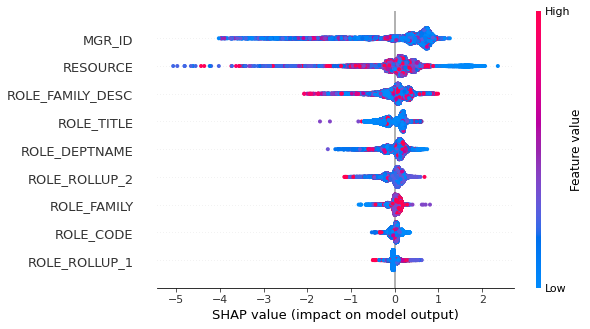

In [77]:
shap.summary_plot(shap_values, X)

From this graph you can see that values of MGR_ID and RESOURCE features have a large negative impact for many objects.
You can also see that RESOURCE has largest positive impact for many objects.

## Saving the model

You can save your model as a binary file. It is also possible to save the model as Python or C++ code.
If you save the model as a binary file you can then look on the parameters with which the model was trained, including learning_rate and random_seed that are set automatically if you don't specify them.

In [72]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train,
    y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False,
)
my_best_model.save_model("catboost_model.bin")

In [73]:
my_best_model.load_model("catboost_model.bin")
print(my_best_model.get_params())
print(my_best_model.random_seed_)
print(my_best_model.learning_rate_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0
0.5


## Hyperparameter tunning

You can tune the parameters to get better speed or better quality.
Here is the list of parameters that are important for speed and accuracy.

### Training speed

Here is the list of parameters that are important for speeding up the training.
Note that changing this parameters might decrease the quality.

1. **iterations + learning rate:**
By default we train for 1000 iterations. You can decrease this number, but if you decrease the number of iterations you need to increase learning rate so that the process converges. We set learning rate by default dependent on number of iterations and on your dataset, so you might just use default learning rate. But if you want to tune it, you need to know - the more iterations you have, the less should be the learning rate.

2. **boosting_type:**
By default we use Ordered boosting for smaller datasets where we want to fight overfitting. This is expensive in terms of computations. You can set boosting_type to Plain to disable this.

3. **bootstrap_type:**
By default we sample weights from exponential distribution. It is faster to use sampling from Bernoulli distribution. To enable that use bootstrap_type='Bernoulli' + subsample={some value < 1}

4. **one_hot_max_size:**
By default we use one-hot encoding only for categorical features with little amount of different values. For all other categorical features we calculate statistics. This is expensive, and one-hot encoding is cheep. So you can speed up the training by setting one_hot_max_size to some bigger value

5. **rsm:**
This parameter is very important, because it speeds up the training and does not affect the quality. So you should definitely use it, but only in case if you have hundreds of features.
If you have little amount of features it's better not to use this parameter.
If you have many features then the rule is the following: you decrease rsm, for example, you set rsm=0.1. With this rsm value the training needs more iterations to converge. Usually you need about 20% more iterations. But each iteration will be 10x faster. So the resulting training time will be faster even though you will have more trees in the resulting model.

6. **leaf_estimation_iterations:**
This parameter is responsible for calculating leaf values after you have already selected tree structure.
If you have little amount of features, for example 8 or 10 features, then this place starts to be the bottle-neck.
Default value for this parameter depends on the training objective, you can try setting it to 1 or 5, and if you have little amount of features, this might speed up the training.

7. **max_ctr_complexity:**
By default catboost generates categorical feature combinations in a greedy way.
This is time consuming, you can disable that by setting max_ctr_complexity=1 or by allowing only combinations of 2 features by setting max_ctr_complexity=2.
This will speed up the training only if you have categorical features.

8. **border_count:**
If you are training the model on GPU, you can try decreasing border_count. This is the number of splits considered for each feature. By default it's set to 128, but you can try setting it to 32. In many cases it will not degrade the quality of the model and will speed up the training by a lot. 

In [74]:
from catboost import CatBoost

fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type="Plain",
    bootstrap_type="Bernoulli",
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    border_count=32,
)

fast_model.fit(
    X_train, y_train, cat_features=cat_features, logging_level="Silent", plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

** Question 16: **

Try tunning the speed of the algorithm. What is the maximum speedup you could get by changing these parameters without decreasing of AUC on best iteration on eval dataset compared to AUC on best iteration after training with default parameters and random seed = 0?
The answer shoud be a number, for example 2.7 means you got 2.7 times speedup.

In [78]:
from catboost import CatBoost

slow_model = CatBoostClassifier(
    random_seed=0,
    iterations=150,
    learning_rate=0.01,
    subsample=0.5,
    eval_metric="AUC",
)

slow_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    plot=False,
)

0:	total: 30.2ms	remaining: 4.49s
1:	total: 51.5ms	remaining: 3.81s
2:	total: 86.1ms	remaining: 4.22s
3:	total: 94.5ms	remaining: 3.45s
4:	total: 106ms	remaining: 3.06s
5:	total: 117ms	remaining: 2.8s
6:	total: 131ms	remaining: 2.68s
7:	total: 140ms	remaining: 2.48s
8:	total: 149ms	remaining: 2.33s
9:	total: 157ms	remaining: 2.19s
10:	total: 170ms	remaining: 2.15s
11:	total: 192ms	remaining: 2.21s
12:	total: 200ms	remaining: 2.11s
13:	total: 213ms	remaining: 2.07s
14:	total: 241ms	remaining: 2.17s
15:	total: 272ms	remaining: 2.28s
16:	total: 283ms	remaining: 2.21s
17:	total: 296ms	remaining: 2.17s
18:	total: 314ms	remaining: 2.17s
19:	total: 322ms	remaining: 2.09s
20:	total: 328ms	remaining: 2.02s
21:	total: 334ms	remaining: 1.94s
22:	total: 345ms	remaining: 1.9s
23:	total: 356ms	remaining: 1.87s
24:	total: 366ms	remaining: 1.83s
25:	total: 383ms	remaining: 1.83s
26:	total: 390ms	remaining: 1.77s
27:	total: 396ms	remaining: 1.72s
28:	total: 410ms	remaining: 1.71s
29:	total: 421ms	remai

In [79]:
from catboost import CatBoost

fast_model = CatBoostClassifier(
    random_seed=0,
    iterations=150,
    learning_rate=0.01,
    boosting_type="Plain",
    bootstrap_type="Bernoulli",
    subsample=0.5,
    one_hot_max_size=20,
    # rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    # border_count=32,
)

fast_model.fit(X_train, y_train, cat_features=cat_features, plot=False)

0:	learn: 0.6808597	total: 22.2ms	remaining: 3.31s
1:	learn: 0.6690582	total: 48.6ms	remaining: 3.6s
2:	learn: 0.6570421	total: 70.2ms	remaining: 3.44s
3:	learn: 0.6457640	total: 80.9ms	remaining: 2.95s
4:	learn: 0.6344235	total: 108ms	remaining: 3.13s
5:	learn: 0.6234907	total: 131ms	remaining: 3.15s
6:	learn: 0.6126065	total: 167ms	remaining: 3.42s
7:	learn: 0.6024507	total: 180ms	remaining: 3.19s
8:	learn: 0.5925799	total: 189ms	remaining: 2.96s
9:	learn: 0.5828873	total: 216ms	remaining: 3.02s
10:	learn: 0.5735575	total: 233ms	remaining: 2.95s
11:	learn: 0.5641946	total: 268ms	remaining: 3.08s
12:	learn: 0.5553335	total: 283ms	remaining: 2.98s
13:	learn: 0.5466272	total: 293ms	remaining: 2.84s
14:	learn: 0.5381407	total: 310ms	remaining: 2.79s
15:	learn: 0.5297053	total: 332ms	remaining: 2.78s
16:	learn: 0.5216760	total: 348ms	remaining: 2.72s
17:	learn: 0.5135018	total: 386ms	remaining: 2.83s
18:	learn: 0.5059707	total: 407ms	remaining: 2.81s
19:	learn: 0.4985535	total: 428ms	rema

In [80]:
metrics = slow_model.eval_metrics(data=pool1, metrics=["Logloss", "AUC"], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [81]:
metrics = fast_model.eval_metrics(data=pool1, metrics=["Logloss", "AUC"], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [82]:
speedup = 0
grader.submit_tag("speedup", speedup)

Current answer for task speedup is: 0


### Accuracy

The parameters listed below are important to get the best quality of the model. Try changing this parameters to improve the quality of the resulting model

In [83]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method="Newton",
    depth=6,
)
tunned_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    logging_level="Silent",
    eval_set=(X_validation, y_validation),
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [84]:
metrics = tunned_model.eval_metrics(data=pool1, metrics=["Logloss", "AUC"], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [85]:
np.max(metrics["AUC"])

0.9858712365906097

** Question 17: **

Try tunning these parameters to make AUC on eval dataset as large as possible. What is the maximum AUC value you have reached?

In [86]:
tunned_model_2 = CatBoostClassifier(
    random_seed=63,
    iterations=2000,
    learning_rate=0.15,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    od_type="Iter",
    od_wait=30,
    depth=6,
)
tunned_model_2.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    logging_level="Silent",
    eval_set=(X_validation, y_validation),
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [87]:
metrics2 = tunned_model_2.eval_metrics(
    data=pool1, metrics=["Logloss", "AUC"], plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [88]:
np.max(metrics2["AUC"])

0.985568389376005

In [89]:
final_auc = 0.985568389376005
grader.submit_tag("final_auc", final_auc)

Current answer for task final_auc is: 0.985568389376005


In [90]:
STUDENT_EMAIL = "gibson870811@gmail.com"  # EMAIL HERE
STUDENT_TOKEN = "iZYKWyaFEBfiQHgL"  # TOKEN HERE
grader.status()

You want to submit these numbers:
Task negative_samples: 1897
Task positive_samples: 30872
Task resource_unique_values: 7518
Task logloss_mean: 0.13760299642
Task logloss_std: 0.0006616215261239671
Task accuracy_6: 0.9440036
Task best_model_name: learning_rate_0.05
Task num_trees: 100
Task mean_logloss_cv: 0.15772628403016933
Task logloss_std_1: 0.0024714754514419818
Task iterations_overfitting: 32
Task auc_550: 0.985
Task feature_importance_top3: ('Feature Id', 'RESOURCE', 'MGR_ID')
Task most_important: RESOURCE
Task shap_influence: -1
Task speedup: 0
Task final_auc: 0.985568389376005


In [91]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
